<a href="https://colab.research.google.com/github/MaengJoonYoung/Section3_Project/blob/main/Preprocessing%26model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,526 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
import matplotlib.pyplot as plt  # 한글 포트 오류
import matplotlib as mpl

plt.rc('font', family='NanumBarunGothic') 
mpl.rc('axes', unicode_minus=False)

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [ ]:
import pandas as pd
import sqlite3
import pandas_profiling
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving used_bicycle.db to used_bicycle.db


In [ ]:
conn = sqlite3.connect('used_bicycle.db')

In [ ]:
df = pd.read_sql_query("SELECT * FROM bicycle", conn)
df

,Id,brand,price,old,brake,drivetrain,material
0,1,자이언트,"3,900,000원",2021,디스크 브레이크,SHIMANO ULTEGRA,카본
1,2,스페셜라이즈드,"6,900,000원",2021,디스크 브레이크,SRAM Force eTap AXS,카본
2,3,첼로,"250,000원",2014,림 브레이크,SHIMANO SORA,알루미늄
3,4,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
4,5,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
...,...,...,...,...,...,...,...
1687,1688,포커스,"2,524,500원",2018,림 브레이크,SHIMANO ULTEGRA,카본
1688,1689,메리다,"814,000원",2016,림 브레이크,SHIMANO 105,카본
1689,1690,인피자,"600,000원",2015,림 브레이크,SHIMANO ULTEGRA,카본
1690,1691,첼로,"1,050,000원",2018,림 브레이크,SHIMANO ULTEGRA,카본


In [ ]:
df_new = df.copy()
df_new

,Id,brand,price,old,brake,drivetrain,material
0,1,자이언트,"3,900,000원",2021,디스크 브레이크,SHIMANO ULTEGRA,카본
1,2,스페셜라이즈드,"6,900,000원",2021,디스크 브레이크,SRAM Force eTap AXS,카본
2,3,첼로,"250,000원",2014,림 브레이크,SHIMANO SORA,알루미늄
3,4,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
4,5,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
...,...,...,...,...,...,...,...
1687,1688,포커스,"2,524,500원",2018,림 브레이크,SHIMANO ULTEGRA,카본
1688,1689,메리다,"814,000원",2016,림 브레이크,SHIMANO 105,카본
1689,1690,인피자,"600,000원",2015,림 브레이크,SHIMANO ULTEGRA,카본
1690,1691,첼로,"1,050,000원",2018,림 브레이크,SHIMANO ULTEGRA,카본


In [ ]:
df_new.drop(columns='Id', inplace=True)
df_new.drop(1, inplace=True)
df_new

,brand,price,old,brake,drivetrain,material
0,자이언트,"3,900,000원",2021,디스크 브레이크,SHIMANO ULTEGRA,카본
2,첼로,"250,000원",2014,림 브레이크,SHIMANO SORA,알루미늄
3,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
4,자이언트,"600,000원",2021,림 브레이크,SHIMANO CLARIS,알루미늄
5,리들리,"6,500,000원",2017,림 브레이크,SHIMANO DURA-ACE Di2,카본
...,...,...,...,...,...,...
1687,포커스,"2,524,500원",2018,림 브레이크,SHIMANO ULTEGRA,카본
1688,메리다,"814,000원",2016,림 브레이크,SHIMANO 105,카본
1689,인피자,"600,000원",2015,림 브레이크,SHIMANO ULTEGRA,카본
1690,첼로,"1,050,000원",2018,림 브레이크,SHIMANO ULTEGRA,카본


In [ ]:
df_new['price'] = df_new['price'].str.replace(',','')
df_new['price'] = df_new['price'].str.replace('원','').astype(int)

In [ ]:
from scipy import stats
import numpy as np

z = stats.zscore(df_new['price'])
condition = (np.abs(z) < 3)
df_new = df_new[condition]

print(len(df_new))

1660


In [ ]:
mask = (df_new.price >= 100000)
df_new = df_new[(mask)]
print(len(df_new))

1643


In [ ]:
year_mask = ((df_new.old >= 2010) & (df_new.old <= 2021))
df_new = df_new[year_mask]
df_new['old'].min()

2010

In [ ]:
df_new

,brand,price,old,brake,drivetrain,material
0,자이언트,3900000,2021,디스크 브레이크,SHIMANO ULTEGRA,카본
2,첼로,250000,2014,림 브레이크,SHIMANO SORA,알루미늄
3,자이언트,600000,2021,림 브레이크,SHIMANO CLARIS,알루미늄
4,자이언트,600000,2021,림 브레이크,SHIMANO CLARIS,알루미늄
5,리들리,6500000,2017,림 브레이크,SHIMANO DURA-ACE Di2,카본
...,...,...,...,...,...,...
1687,포커스,2524500,2018,림 브레이크,SHIMANO ULTEGRA,카본
1688,메리다,814000,2016,림 브레이크,SHIMANO 105,카본
1689,인피자,600000,2015,림 브레이크,SHIMANO ULTEGRA,카본
1690,첼로,1050000,2018,림 브레이크,SHIMANO ULTEGRA,카본


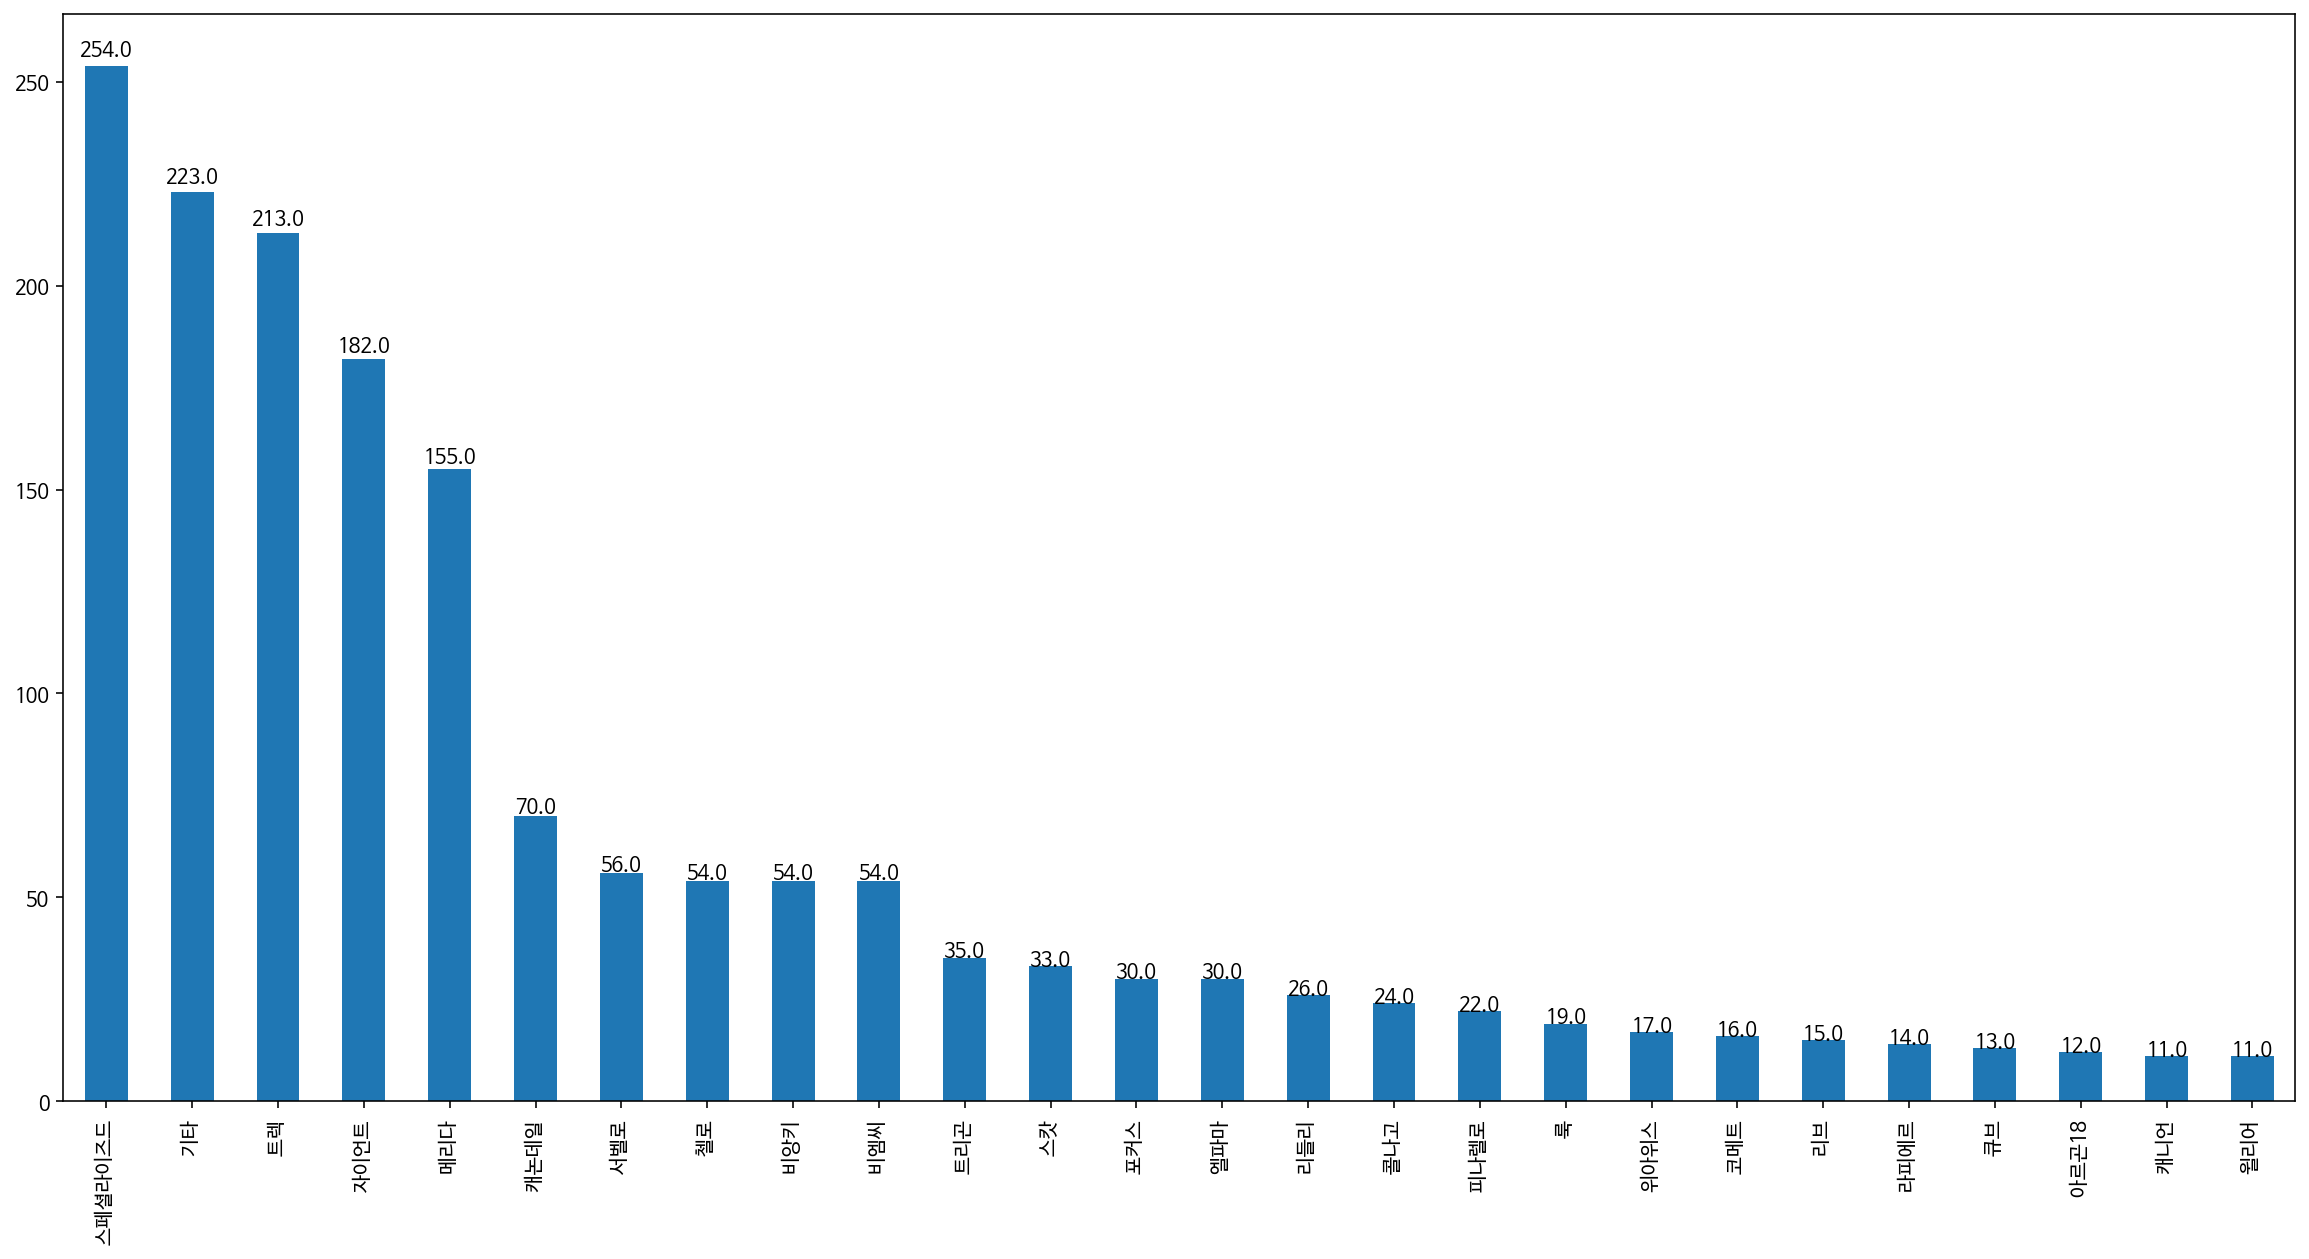

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

plt.figure(figsize = (20,10))
ax = df_new['brand'].value_counts().plot.bar()
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate(height, (left+width/2, height*1.01), ha='center')
plt.show()

In [ ]:
brand_list = df_new['brand'].value_counts()
condition_brand = (df_new['brand'].value_counts() < 10)
for etc in brand_list[condition_brand].to_dict().keys():
   df_new['brand'] = df_new['brand'].str.replace(etc,'기타 ')

df_new['brand'].value_counts()

스페셜라이즈드     236
기타          218
트렉          203
자이언트        174
메리다         155
캐논데일         70
서벨로          55
첼로           54
비앙키          53
비엠씨          50
트리곤          33
스캇           31
포커스          30
엘파마          29
리들리          26
콜나고          22
피나렐로         22
룩            19
위아위스         16
코메트          15
리브           14
라피에르         14
큐브           13
아르곤18        12
윌리어          11
캐니언          11
Name: brand, dtype: int64

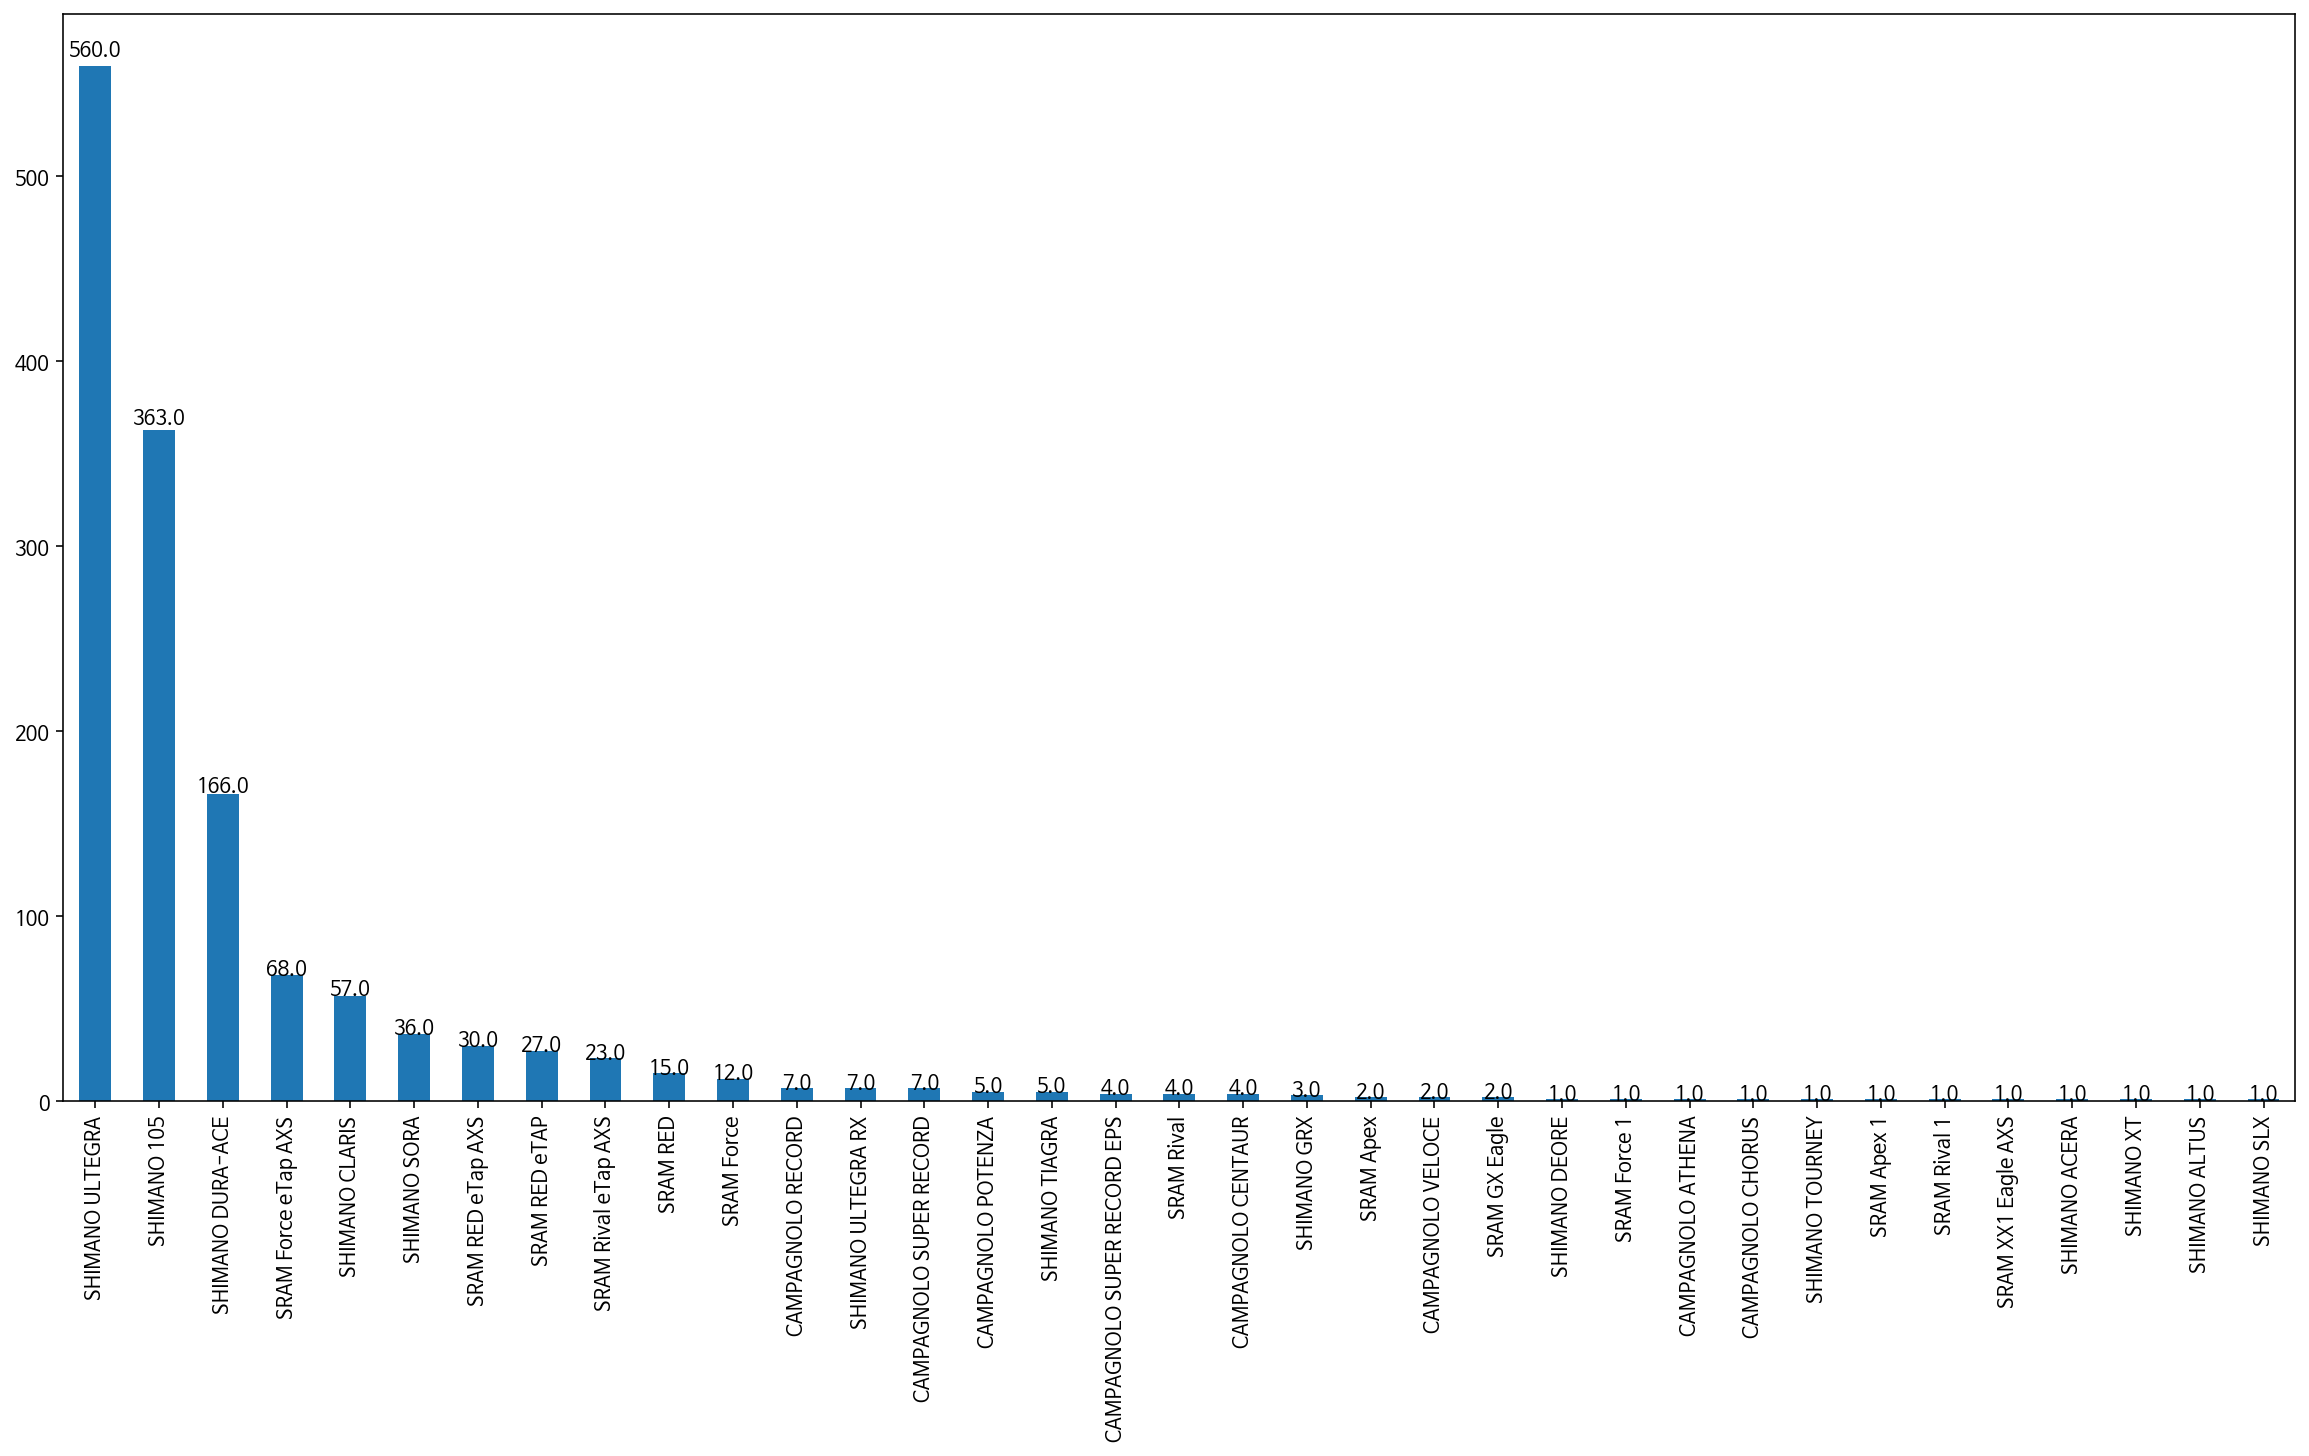

In [ ]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

plt.figure(figsize = (20,10))
ax = df_new['drivetrain'].value_counts().plot.bar()
for p in ax.patches:
  left, bottom, width, height = p.get_bbox().bounds
  ax.annotate(height, (left+width/2, height*1.01), ha='center')
plt.show()

In [ ]:
df_new['drivetrain'] = df_new['drivetrain'].str.replace(' Di2', '')

In [ ]:
drivetrain_list = df_new['drivetrain'].value_counts()
condition_drivetrain = (df_new['drivetrain'].value_counts() < 10)
for etc in drivetrain_list[condition_drivetrain].to_dict().keys():
   df_new['drivetrain'] = df_new['drivetrain'].str.replace(etc,'기타')

In [ ]:
df_new['drivetrain'] = df_new['drivetrain'].str.replace('기타 eTap AXS', 'SRAM Rival eTap AXS')
df_new['drivetrain'] = df_new['drivetrain'].str.replace('기타 EPS', '기타')
df_new['drivetrain'] = df_new['drivetrain'].str.replace('기타 1', '기타')
df_new['drivetrain'].value_counts()

SHIMANO ULTEGRA        646
SHIMANO 105            422
SHIMANO DURA-ACE       180
SRAM Force eTap AXS     72
SHIMANO CLARIS          70
기타                      67
SHIMANO SORA            40
SRAM RED eTap AXS       32
SRAM RED eTAP           28
SRAM RED                17
SRAM Force              12
Name: drivetrain, dtype: int64

In [ ]:
print('중복 제거 전: ', len(df_new))
df_new.drop_duplicates(inplace = True)
print('중복 제거 후: ', len(df_new))

중복 제거 전:  1586
중복 제거 후:  1370


In [ ]:
df_new.reset_index(drop=True, inplace=True)
df_new

,brand,price,old,brake,drivetrain,material
0,자이언트,3900000,2021,디스크 브레이크,SHIMANO ULTEGRA,카본
1,첼로,250000,2014,림 브레이크,SHIMANO SORA,알루미늄
2,자이언트,600000,2021,림 브레이크,SHIMANO CLARIS,알루미늄
3,리들리,6500000,2017,림 브레이크,SHIMANO DURA-ACE,카본
4,트렉,6500000,2019,디스크 브레이크,SRAM RED,카본
...,...,...,...,...,...,...
1361,포커스,2524500,2018,림 브레이크,SHIMANO ULTEGRA,카본
1362,메리다,814000,2016,림 브레이크,SHIMANO 105,카본
1363,기타,600000,2015,림 브레이크,SHIMANO ULTEGRA,카본
1364,첼로,1050000,2018,림 브레이크,SHIMANO ULTEGRA,카본


In [ ]:
df_new.profile_report()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
target = 'price'
feature = ['brand', 'old', 'brake', 'drivetrain', 'material']

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, test_size =.2, random_state=2)
train, val = train_test_split(train, test_size =.2, random_state=2)
len(train), len(val), len(test)

(905, 227, 283)

In [ ]:
X_train =train[feature]
y_train = train[target]

X_val = val[feature]
y_val = val[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
# 다중선형

from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)
val_result = r2_score(y_val, y_pred)

y_pred_train = pipe.predict(X_train)
train_result = r2_score(y_train, y_pred_train)

print(f'''
훈련 데이터 r2_score : {train_result}
검증 데이터 r2_score : {val_result}
''')


훈련 데이터 r2_score : 0.6981256445386761
검증 데이터 r2_score : 0.6978251126766954



In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, test_size=.2, random_state=2)

In [ ]:
X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
# RandomForest

from scipy.stats import randint, uniform
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(random_state=2)
)

dist = {
    'randomforestregressor__n_estimators' : randint(50,200),
    'randomforestregressor__max_depth' : randint(5,20),
    'randomforestregressor__max_features' : uniform(0,1)
}

clf = RandomizedSearchCV(
    pipe,
    param_distributions = dist,
    n_iter =50,
    cv = 3,
    scoring = 'r2',
    verbose= 1,
    n_jobs = -1,
    random_state = 2
)

clf.fit(X_train,y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
clf.best_score_

0.6848029477681962

In [ ]:
pip install xgboost

In [ ]:
# XGB
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

pipe_2 = make_pipeline(
    TargetEncoder(),
    XGBRegressor(random_state=2)
)

dist_2 = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],
    'targetencoder__min_samples_leaf': randint(1, 10),
    'xgbregressor__n_estimators' : randint(50,200),
    'xgbregressor__max_depth' : randint(5,20),
    'xgbregressor__learning_rate' : uniform(0,1)
}

clf_2 = RandomizedSearchCV(
    pipe_2,
    param_distributions = dist_2,
    n_iter =50,
    cv =3,
    scoring = 'r2',
    verbose =1,
    n_jobs = -1,
    random_state = 2
)

clf_2.fit(X_train,y_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[14:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
clf_2.best_score_

0.7148223717692842

In [ ]:
clf_2.best_params_

{'xgbregressor__learning_rate': 0.2172699264401201,
 'xgbregressor__max_depth': 5,
 'xgbregressor__n_estimators': 76}

In [ ]:
df_new.to_csv('bicycle.csv', index=False)